In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, accuracy_score


In [2]:
data=pd.read_csv("haber_bosch_dataset.csv")
x=data[['temperature', 'pressure', 'h2_n2_ratio', 'catalyst_age', 'space_velocity']]
y_conversion = data['conversion']
y_fault = data['fault']
data

,temperature,pressure,h2_n2_ratio,catalyst_age,space_velocity,conversion,energy_consumption,production_rate,emissions,fault
0,456.181018,209.045328,2.873641,499.670244,24599.966220,0.308303,2304.126879,18.202173,1678.505270,0
1,542.607146,221.015349,2.832912,746.746773,13690.239912,0.399213,2879.745852,13.116777,2073.743575,1
2,509.799091,278.182109,2.676154,562.666781,16932.793887,0.528990,2732.930622,21.497471,2053.656924,0
3,489.798773,201.000658,3.107267,83.302583,23265.612737,0.436765,2556.916406,24.387831,1904.926882,0
4,423.402796,280.447453,2.976624,185.580237,19641.786890,0.495532,2423.141760,23.359537,1897.805883,0
...,...,...,...,...,...,...,...,...,...,...
4995,534.609598,278.648398,3.150883,877.038629,16549.740177,0.491251,2913.753783,19.512194,2104.229778,1
4996,417.907152,284.626325,2.677798,46.813957,24539.326889,0.422131,2234.250822,24.861170,1634.265014,0
4997,449.176426,292.006187,2.551240,303.698469,28465.481727,0.608270,2553.175378,41.555282,1853.277792,1
4998,522.361807,209.623199,3.182962,443.320006,22745.712936,0.438067,2837.711737,23.913946,2109.990057,0


In [3]:
x_train, x_test, y_conv_train, y_conv_test, y_fault_train, y_fault_test = train_test_split(x, y_conversion, y_fault, test_size=0.2, random_state=42)


In [4]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.transform(x_test)

In [5]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
def train_fault_detection(x_train, y_fault_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(x_train, y_fault_train)
    return model

In [6]:
def train_conversion_classification(x_train, y_conv_train):
    model= RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(x_train, y_conv_train)
    return model

In [7]:
conversion_model= train_conversion_classification(x_train_scale, y_conv_train)
fault_model= train_fault_detection(x_train_scale, y_fault_train)

In [8]:
conversion_predict= conversion_model.predict(x_test_scale)
print(conversion_predict)

[0.15323753 0.18108452 0.3027891  0.25738809 0.43380171 0.34391112
 0.42375008 0.29227617 0.46102808 0.34915416 0.37780768 0.23364863
 0.17159716 0.29979856 0.62551821 0.36528865 0.15174531 0.08532843
 0.38408352 0.33270643 0.5104018  0.11016692 0.76309004 0.14914543
 0.48800523 0.14651324 0.21326275 0.15030342 0.61293635 0.11007445
 0.54695675 0.36844687 0.19609872 0.34424863 0.39986984 0.48531305
 0.37018045 0.07992223 0.51102474 0.67095492 0.54894452 0.46066853
 0.0570299  0.16029592 0.34248383 0.35445517 0.38366098 0.31639212
 0.02694157 0.37828574 0.58919819 0.22861724 0.57946539 0.65844322
 0.44080539 0.27467066 0.86283091 0.11810878 0.22832892 0.20477393
 0.3959525  0.23435911 0.24864159 0.62457934 0.33139787 0.45059122
 0.60026651 0.40427136 0.28706272 0.14246762 0.55765321 0.1985755
 0.60638301 0.32298828 0.32504726 0.2548037  0.42646499 0.21080234
 0.36927366 0.24262581 0.29086428 0.19124754 0.28699241 0.56848603
 0.11388638 0.15474572 0.41236091 0.11359594 0.63748676 0.05017

In [9]:
fault_predict= fault_model.predict(x_test_scale)
print(fault_predict)

[0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1
 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0
 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1
 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1
 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1
 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 0 0 0 1 

In [20]:
conv_mse = root_mean_squared_error(y_conv_test, conversion_predict)
fault_accuracy = accuracy_score(y_test, fault_predict)
print(conv_mse)
print(fault_accuracy)

0.0018302909766090341
1.0


In [23]:
from joblib import dump, load
dump(conversion_model, 'conversion_model.joblib')
dump(fault_model, 'fault_model.joblib')

['fault_model.joblib']

Cross-validation scores: [1.    0.999 1.    0.998 1.   ]
Mean CV score: 0.9994


c:\Users\aprit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


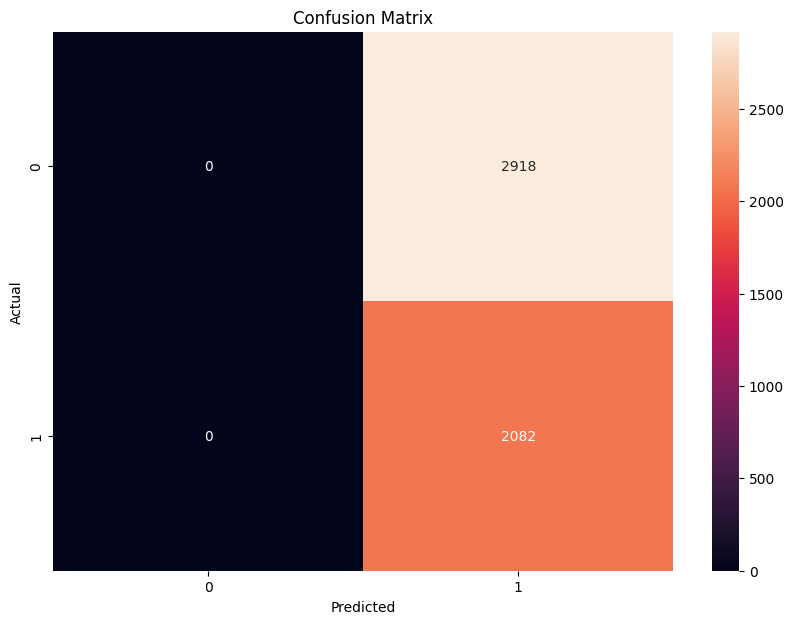

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2918
           1       0.42      1.00      0.59      2082

    accuracy                           0.42      5000
   macro avg       0.21      0.50      0.29      5000
weighted avg       0.17      0.42      0.24      5000



c:\Users\aprit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aprit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aprit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

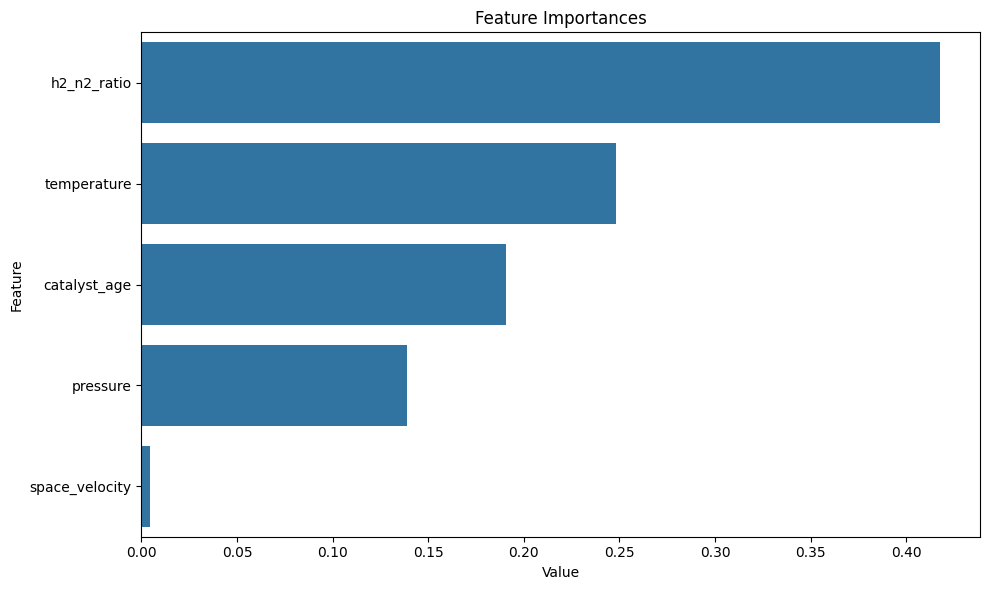

Class distribution:
fault
0    0.5836
1    0.4164
Name: proportion, dtype: float64


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
fault_model=load("fault_model.joblib")
data=pd.read_csv("haber_bosch_dataset1.csv")
x=data[['temperature', 'pressure', 'h2_n2_ratio', 'catalyst_age', 'space_velocity']]
y_conversion = data['conversion']
y_fault = data['fault']
x_train, x_test, y_conv_train, y_conv_test, y_fault_train, y_fault_test = train_test_split(x, y_conversion, y_fault, test_size=0.2, random_state=42)


# Assuming you have your model, X, and y_fault from earlier

# Cross-validation
cv_scores = cross_val_score(fault_model, x, y_fault, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

# Confusion Matrix
y_pred = fault_model.predict(x)
cm = confusion_matrix(y_fault, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print(classification_report(y_fault, y_pred))

# Feature Importance (if using a tree-based model like Random Forest)
if hasattr(fault_model, 'feature_importances_'):
    importances = fault_model.feature_importances_
    feature_imp = pd.DataFrame(sorted(zip(importances, x.columns)), columns=['Value','Feature'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show()

# Class distribution
print("Class distribution:")
print(y_fault.value_counts(normalize=True))